In [1]:
from init import *
from testURL import *

In [ ]:
PATH = "/Users/mdjavedlferdous/Documents/Dataset/Testing"

### Search


In [ ]:
from init import *
from allURL import *

def search(myDict, search1):
    search.a=[]
    for key, value in myDict.items():
        if search1 in value:
            search.a.append(key)
    return len(search.a)

def search_query(_url_):
    s_inner,is_button,search_attribute, noWord, sClass,search_button_attribute_value  = ([] for i in range(6)) 
    BnoWord = 0
    myFile=open(_url_,'r',encoding="latin-1")
    soup=BeautifulSoup(myFile,"html5lib")
    try:
        for tests in soup.findAll('form'):
            if('search' in list(tests.attrs.values())):
                search_attribute.append(1)
            else:
                search_attribute.append(0) 
            if " " == tests.text:
                s_inner.append(0)
                
            else:
                s_inner.append(1)                
            my_no = tests.attrs
            noWord.append(search(my_no, "search"))
            
            is_present = bool(re.search('button', str(tests)))
            if(is_present == True):
                is_button.append(1)
            else:
                is_button.append(0)
                
            buttonSearch = tests.find("button")
            button_attributes = buttonSearch.attrs
            BnoWord = search(button_attributes, "search")
            if(BnoWord == 1):
                search_button_attribute_value.append(1)
            else:
                search_button_attribute_value.append(0)
  
            
    except:
        search_button_attribute_value.append(0)
    
    if (s_inner ==[]):
        s_inner = [0]
    if (search_attribute ==[]):
        search_attribute = [0]
    if (noWord ==[]):
        noWord = [0]
    if (is_button ==[]):
        is_button = [0]
    if (search_button_attribute_value ==[]):
        search_button_attribute_value = [0]    
    if (sClass ==[]):
        sClass = [1]
    
    temp = len(s_inner)*[_url_]
    
    return temp,s_inner, search_attribute,noWord,is_button, search_button_attribute_value
# for i in range(100):
#     print([i],search_query(turl[i]))
#print(search_query(turl[3]))

In [ ]:
def get_class_data(searchQ) :
        name_url, search_innertext,search_attribute,noWord, is_button, search_button_attribute_value = search_query(searchQ)
        print(name_url, search_innertext,search_attribute,noWord, is_button, search_button_attribute_value)
        search_innertext = str(search_innertext)[1:-1].replace(",","").replace(" ","")
        search_attribute = str(search_attribute)[1:-1].replace(",","").replace(" ","")
        noWord = str(noWord)[1:-1].replace(",","").replace(" ","")
        is_button = str(is_button)[1:-1].replace(",","").replace(" ","")
        search_button_attribute_value = str(search_button_attribute_value)[1:-1].replace(",","").replace(" ","")
        temp = []
        temp2 = []
        
        for i in search_innertext:
            search_innertext = i
            temp.append([search_innertext])        
            
        t_search_attribute = []
        for m in search_attribute:
            t_search_attribute.append(m)
        arr2d = np.matrix(temp)
        column_to_add = np.array(t_search_attribute)
        output = np.column_stack((arr2d, column_to_add))
        f_search_attribute = output.tolist()
        
        t_noWord = []
        for m in noWord:
            t_noWord.append(m)
        a_noWord = np.matrix(f_search_attribute)
        column_noWord = np.array(t_noWord)
        o_noWord = np.column_stack((a_noWord, column_noWord))
        f_noWord = o_noWord.tolist()        
        
        t_is_button= []
        for m in is_button:
            t_is_button.append(m)
        a_is_button = np.matrix(f_noWord)
        column_is_button= np.array(t_is_button)
        o_is_button = np.column_stack((a_is_button, column_is_button))
        f_is_button= o_is_button.tolist()        
        
        t_s_value= []
        for m in search_button_attribute_value:
            t_s_value.append(m)
        a_s_value = np.matrix(f_is_button)
        column_s_value= np.array(t_s_value)
        o_s_value = np.column_stack((a_s_value, column_s_value))
        f_s_value= o_s_value.tolist()
        
        t_name= []
        for m in name_url:
            t_name.append(m)
        a_name = np.matrix(f_s_value)
        column_name = np.array(t_name)
        o_name = np.column_stack((a_name, column_name))
        f_name= o_name.tolist()
        
        return f_name
get_class_data(turl[3])

### Export  to CSV

In [ ]:
def write_header():
    list_of_header = ["search_innertext", "search_attribute", "Number_of_search_word","search_button_attribute_value","is_button",  "URL name"]
    save_path = 'result/search/'
    file_name = "SearchList_test__1.csv"
    completeName = os.path.join(save_path, file_name)

    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(list_of_header)

def write_CSV(tlist):
    save_path = 'result/search/'
    file_name = "SearchList_test__1.csv"
    completeName = os.path.join(save_path, file_name)

    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(tlist)
    with open(completeName, "r", newline="") as fr:
        reader = csv.reader(fr)
        lines= len(list(reader))
        print("[",lines,"].", "form!")

def main():
    write_header()
    for i in range(0,100):
            print(write_CSV(get_class_data(turl[i])))

if __name__ == "__main__":
    main()

#### Split all the webpage into separate CSV file

In [ ]:
data = pd.read_csv("./result/search/SearchList_test__1.csv")

for (gender), group in data.groupby(['URL name']):
     group.to_csv(f'{gender}.csv', index=False)

# for i in range(0,1):
#     namecsv = turl[i]+".csv"
# print(pd.read_csv(namecsv))
# # print(pd.read_csv("/Users/mdjavedulferdous/Desktop/TiiS/Code/result/search/Ajio.html.csv"))


In [ ]:
# # Import libraries
# import glob
# import pandas as pd

# # Get CSV files list from a folder
# path = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/search/model_csv'
# csv_files = glob.glob(path + "/*.csv")

# # Read each CSV file into DataFrame
# # This creates a list of dataframes
# for file in csv_files:
#     Search_csv_df = pd.read_csv(file)
#     search_URL_name = Search_csv_df[["URL name"]]
#     nameCSV = (search_URL_name["URL name"][0].split('/')[-1]).split('.')[0]
#     nameCSV = nameCSV+'.csv'
#     Search_X_test = Search_csv_df[["search_innertext", "search_attribute", "Number_of_search_word","search_button_attribute_value","is_button"]]
#     searchname = "/Users/mdjavedulferdous/Desktop/TiiS/Code/search_model.sav"
#     target_names = ['Non-Search', 'Search']
#     data1_import = evaluation(Search_X_test,searchname,target_names,search_URL_name)
#     data2_import = pd.read_csv(Search_searchpath)   
#     data_merge = pd.concat([data1_import, data2_import],axis=1)
#     data_merge.to_csv(nameCSV, index = False)  # Export merged pandas DataFrame

#### Compare with GT

In [ ]:
GTdata = pd.read_csv("./result/search/search_GT__1.csv")
extractedFrame = pd.read_csv("/Users/mdjavedulferdous/Desktop/TiiS/Code/search_after _model/1mg.csv")
for i in range(len(GTdata['URL name'])):
    if  any(GTdata['URL name'][i] == extractedFrame['URL name']):
        if (extractedFrame['0'].item() < extractedFrame['1'].item()) and GTdata['sClass'][i] ==1 :
            print("TRUE Prediction")



### Page

In [ ]:
def pageListFunction(_url_):
    myFile=open(_url_,'r',encoding="latin-1")
    soup=BeautifulSoup(myFile,"html5lib")
    
    divPageList, navPageList,liPageList,ulPageList,spanPageList, sectionPageList, buttonPageList, \
    trPageList, footerPageList, aPageList, paginationPageList, bPageList \
    = soup.findAll('div'), soup.findAll('nav'), \
    soup.findAll('li'), soup.findAll('ul'),\
    soup.findAll('span'), soup.findAll('section'), \
    soup.findAll('button'), soup.findAll('tr'), \
    soup.findAll('footer'), soup.findAll('a'), \
    soup.findAll('pagination'), soup.findAll('b')
    
    try:
        if divPageList != []:    
            return pageList_Extract(soup, 'div',_url_)
        
        if navPageList != []:    
            return pageList_Extract(soup, 'nav',_url_)
        
        if liPageList != []: 
            return pageList_Extract(soup, 'li',_url_)
        
        if ulPageList != []: 
            return pageList_Extract(soup, 'ul',_url_)
        
        if spanPageList != []:  
            return pageList_Extract(soup, 'span',_url_)
        
        if sectionPageList != []: 
            return pageList_Extract(soup, 'section',_url_) 
        
        if buttonPageList != []: 
            return pageList_Extract(soup, 'button',_url_)
        
        if trPageList != []: 
            return pageList_Extract(soup, 'tr',_url_) 
        
        if footerPageList != []: 
            return pageList_Extract(soup, 'footer',_url_) 
        
        if aPageList != []: 
            return pageList_Extract(soup, 'a',_url_) 
        
        if paginationPageList != []: 
            
            return pageList_Extract(soup, 'pagination',_url_) 
        
        if bPageList != []: 
            return  pageList_Extract(soup, 'b',_url_)  
        else:
            return _url_,"0","0","0","0","0","0","0"
    except:
        pass
def search(myDict, search1):
    search.a=[]
    for key, value in myDict.items():
        if search1 in value:
            search.a.append(key)
    return len(search.a)


def pageList_Extract(soup, tag,_url_):  
    pageClass, NumOfPage, pageListAttribute, is_page, NumOfButton, NumOfLinks, NumberOfValues, outsideURL, insideURL, commonURL, \
    navType= [] ,[], [],[], [], [], [], [], [], [], []
    
    print("Tag: ", tag)
    for ele in soup.findAll(tag):
        try:
                count, btn, valueCounter = 0, 0, 0
                nText = ele.text
                #=======================Page Name======================= 
                is_present = bool(re.search('page', str(ele)) or re.search('show', str(ele)))
                if(is_present == True):
                    is_page.append(1)
                else:
                    is_page.append(0)
                #====================Number of links==================== 
                for link in ele.find_all('a'):
                    count += 1
                NumOfLinks.append(count)
                #====================Number of Button==================== 
                for btnlink in ele.find_all('button'):
                    btn += 1
                NumOfButton.append(btn)
                #=======================Common url=======================
                insideURL, outsideURL = [], []
                for link in ele.find_all('a'):
                    insideURL.append(link.get('href'))
                for link in soup.find_all('a'):
                    outsideURL.append(link.get('href'))
                def compare(list1,list2):
                    ln= []
                    for i in list1:
                        if i  in list2:
                           ln.append(i)
                    return ln
                s = -len(set(compare(insideURL,outsideURL)))+len(outsideURL)
                commonURL.append(s)
                
                #=====================Number of values=====================
                for link in ele.find_all('a'):
                    if (link.text).isdigit()==True:
                        valueCounter += 1
                NumberOfValues.append(valueCounter)
                #print(valueCounter)
                
                #=====================Number of pages=====================
                temp1 = re.findall(r'\d+', ele.text) 
                res2 = list(map(int, temp1))
                if(len(res2)==1):
                    if res2==[0] or res2==[]:
                        NumOfPage.append(1)
                    else:
                        NumOfPage.append(str(res2[0])[0:2])
                else:
                    if res2==[0] or res2==[]:
                        NumOfPage.append(1)
                    else:
                        NumOfPage.append(str(res2[-1])[0:2])
                #=====================Navigation type=====================
                nav = ele.find('button')
                alink = ele.find('a')
                if (bool(nav)) == True:
                    if(bool(alink)) == True and (bool(nav)) == True:
                        navType.append(3)
                    else:
                        navType.append(1)
                elif(bool(alink)) == True:
                    navType.append(2)
                else:
                    navType.append(0)
        except:
                NumOfPage.append(0)
                navType.append(0)
                pass
    
    name_url = len(NumOfLinks)*[_url_]
    if (NumOfLinks ==[] or NumOfLinks is None):
        NumOfLinks = [0]
    if (NumOfButton ==[] or NumOfButton is None):
        NumOfButton = [0] 
    if (commonURL ==[] or commonURL is None):
        commonURL = [0] 
    if (is_page == [] or is_page is None):
        is_page = [0]    
    if (NumOfPage == [] or NumOfPage is None):
        NumOfPage = [0]
    if (NumberOfValues == [] or NumberOfValues is None):
        NumberOfValues = [0]
    if (navType == [] or navType is None):
        navType = [0]
    #print(len(navType), len(name_url), len(NumOfButton), len(NumOfLinks), (commonURL), len(is_page), len(pageClass), len(NumOfPage))     
    return name_url, NumOfButton, NumOfLinks, commonURL, NumberOfValues, is_page, NumOfPage, navType 

#print(pageListFunction(turl[4]))
def get_class_data(searchQ) :
        start_time= time.time()
        name_url, NumOfButton, NumOfLinks, commonURL,NumberOfValues, is_page, NumOfPage, navType = pageListFunction(searchQ)
        #checkBoxList = str(checkBoxList)[1:-1].replace(",","").replace(" ","")
        #insideList = str(insideList)[1:-1].replace(",","").replace(" ","")
        #filterClass = str(filterClass)[1:-1].replace(",","").replace(" ","")        
        temp = []
        temp2 = []
        for i in NumOfButton:
            NumOfButton = i
            temp.append([NumOfButton])        
        
        t_NumOfLinks= []
        for m in NumOfLinks:
            t_NumOfLinks.append(m)
        NumOfLinks_arr2d = np.matrix(temp)
        NumOfLinks_to_add = np.array(t_NumOfLinks)
        output_NumOfLinks = np.column_stack((NumOfLinks_arr2d, NumOfLinks_to_add))
        f_NumOfLinks = output_NumOfLinks.tolist()
        
        t_commonURL = []
        for m in commonURL:
            t_commonURL.append(m)
        commonURL_arr2d = np.matrix(f_NumOfLinks)
        commonURL_to_add = np.array(t_commonURL)
        output_commonURL = np.column_stack((commonURL_arr2d, commonURL_to_add))
        f_commonURL = output_commonURL.tolist()
        
        t_is_Page = []
        for m in is_page:
            t_is_Page.append(m)
        is_Page_arr2d = np.matrix(f_commonURL)
        is_Page_to_add = np.array(t_is_Page)
        output_is_Page = np.column_stack((is_Page_arr2d, is_Page_to_add))
        f_is_Page = output_is_Page.tolist()
        
        t_NumOfPage = []
        for m in NumOfPage:
            t_NumOfPage.append(m)
        NumOfPage_arr2d = np.matrix(f_is_Page)
        NumOfPage_to_add = np.array(t_NumOfPage)
        output_NumOfPage = np.column_stack((NumOfPage_arr2d, NumOfPage_to_add))
        f_NumOfPage = output_NumOfPage.tolist()
        
        t_NumberOfValues = []
        for m in NumberOfValues:
            t_NumberOfValues.append(m)
        NumberOfValues_arr2d = np.matrix(f_NumOfPage)
        NumberOfValues_to_add = np.array(t_NumberOfValues)
        output_NumberOfValues = np.column_stack((NumberOfValues_arr2d, NumberOfValues_to_add))
        f_NumberOfValues = output_NumberOfValues.tolist()
        
        t_navType = []
        for m in navType:
            t_navType.append(m)
        navType_arr2d = np.matrix(f_NumberOfValues)
        navType_to_add = np.array(t_navType)
        output_navType = np.column_stack((navType_arr2d, navType_to_add))
        f_navType = output_navType.tolist()
        

        
        t_name= []
        for m in name_url:
            t_name.append(m)
        a_name = np.matrix(f_navType)
        column_name = np.array(name_url)
        o_name = np.column_stack((a_name, column_name))
        f_name= o_name.tolist()
        
        end = time.time()
        
        hours, rem = divmod(end-start_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print("\nTime takes: {:0>2}:{:0>2}:{:05.2f} Seconds\n".format(int(hours),int(minutes),seconds))
        return f_name
    
#get_class_data(turl[4])    
def write_header():
    list_of_header = ["NumOfButton", "NumOfLinks", "commonURL","is_page", "NumOfPage", "NumberOfValues","navType", "name_url"]
    save_path = 'result/page/'
    file_name = "page_test_set__1.csv"
    completeName = os.path.join(save_path, file_name)

    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(list_of_header)

def write_CSV(tlist):
    save_path = 'result/page/'
    file_name = "page_test_set__1.csv"
    completeName = os.path.join(save_path, file_name)
    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(tlist)
    with open(completeName, "r", newline="") as fr:
        reader = csv.reader(fr)
        lines= len(list(reader))
        print("[",lines,"].", "form!")

def main():
    write_header()
    for i in range(0,100):
            print(write_CSV(get_class_data(turl[i])))

if __name__ == "__main__":
    main()


In [ ]:
data = pd.read_csv("./result/page/page_test_set__1.csv")

for (gender), group in data.groupby(['name_url']):
     group.to_csv(f'{gender}.csv', index=False)

# for i in range(0,1):
#     namecsv = turl[i]+".csv"
# print(pd.read_csv(namecsv))
# # print(pd.read_csv("/Users/mdjavedulferdous/Desktop/TiiS/Code/result/search/Ajio.html.csv"))


In [ ]:
def evaluation(Search_X_test,searchname,target_names,search_URL_name):
    search_model = pickle.load(open(searchname, 'rb'))
    y_score = search_model.predict(Search_X_test)
    y_score_1 = search_model.predict_proba(Search_X_test)*100

    for i in range(len(y_score_1)):
        if y_score_1[i][1] >y_score_1[i][0]:
            print([i],"Positive Result")
            print("TRUE: ",y_score_1[i][1])
            print("FALSE: ",y_score_1[i][0])
            print("==========================")
        else:
            print([i],"Negative Result")
            print("TRUE: ",y_score_1[i][1])
            print("FALSE: ",y_score_1[i][0])
            print("==========================")
    df = pd.DataFrame(y_score_1) 
    return (df)


page_path = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/page/model_csv/Cleartrip.html.csv'
page_csv_df = pd.read_csv(page_path)
page_URL_name = page_csv_df[["name_url"]]
page_X_test = page_csv_df[["NumOfButton", "NumOfLinks", "commonURL","is_page", "NumOfPage", "NumberOfValues","navType"]]
pagename = "/Users/mdjavedulferdous/Desktop/TiiS/Code/page_model.sav"
target_names = ['Non-page', 'page']
page_URL_name = (page_URL_name["name_url"][0].split('/')[-1]).split('.')[0]
nameCSV = page_URL_name+'.csv'

data1_import = evaluation(page_X_test,pagename,target_names,page_URL_name)
data2_import = pd.read_csv(page_path)   
data_merge = pd.concat([data1_import, data2_import],axis=1)

data_merge.to_csv(nameCSV, index = False) 

### Sort

In [ ]:
def sortFunc(_url_):
    sort_inner, sortClass,option_tag_attribute_value, sort_attribute,t_count  = ([] for i in range(5)) 
    myFile=open(_url_,'r',encoding="latin-1")
    
    soup=BeautifulSoup(myFile,"html5lib")
    
    for tests in soup.findAll('select'):
            t_Price = len(tests.findAll(text=re.compile(".*Price.*"))) 
            t_Most = len(tests.findAll(text=re.compile(".*Most recent.*")))
            t_New = len(tests.findAll(text=re.compile(".*New.*")))
            t_Best = len(tests.findAll(text=re.compile(".*Best Match.*")))  
            t_Highest = len(tests.findAll(text=re.compile(".*Highest*"))) 
            t_Ratings = len(tests.findAll(text=re.compile(".*Ratings.*"))) 
            t_Distance = len(tests.findAll(text=re.compile(".*Distance*"))) 
            t_Time = len(tests.findAll(text=re.compile(".*Time*"))) 
            t_Relevance = len(tests.findAll(text=re.compile(".*Relevance*"))) 
            t_Featured = len(tests.findAll(text=re.compile(".*Featured.*"))) 
            t_Recommended = len(tests.findAll(text=re.compile(".*Recommended.*")))
            t_count.append((int(t_Price)+int(t_Most)+int(t_New)+int(t_Best)+int(t_Highest)+int(t_Ratings)+int(t_Distance)+int(t_Time)+int(t_Relevance)+int(t_Featured)+int(t_Recommended)))

            if " " == tests.text:
                sort_inner.append(0)             
            else:
                #print(tests.text)
                if (t_Price or t_Most or t_New or t_Best or  t_Highest or t_Ratings or t_Distance or t_Time or t_Relevance or t_Featured or t_Recommended)!=0:
                    #print(tests(text=lambda t: "sort:" in t))
                    sort_inner.append(1)
                else:
                    sort_inner.append(0)             
            if('sort' in list(tests.attrs.values())):
                #print(tests.attrs.values())
                sort_attribute.append(1)
            else:
                sort_attribute.append(0) 
            optionTag = tests.findAll("option")
            option_tag_attribute_value.append(len(optionTag))
 
    for tests in soup.findAll('ul'):
            t_Price = len(tests.findAll(text=re.compile(".*Price.*"))) 
            t_Most = len(tests.findAll(text=re.compile(".*Most recent.*")))
            t_New = len(tests.findAll(text=re.compile(".*New.*")))
            t_Best = len(tests.findAll(text=re.compile(".*Best Match.*")))  
            t_Highest = len(tests.findAll(text=re.compile(".*Highest*"))) 
            t_Ratings = len(tests.findAll(text=re.compile(".*Ratings.*"))) 
            t_Distance = len(tests.findAll(text=re.compile(".*Distance*"))) 
            t_Time = len(tests.findAll(text=re.compile(".*Time*"))) 
            t_Relevance = len(tests.findAll(text=re.compile(".*Relevance*"))) 
            t_Featured = len(tests.findAll(text=re.compile(".*Featured.*"))) 
            t_Recommended = len(tests.findAll(text=re.compile(".*Recommended.*")))
            t_count.append((int(t_Price)+int(t_Most)+int(t_New)+int(t_Best)+int(t_Highest)+int(t_Ratings)+int(t_Distance)+int(t_Time)+int(t_Relevance)+int(t_Featured)+int(t_Recommended)))
      
            if " " == tests.text:
                sort_inner.append(0)             
            else:
                #print(tests.text)
                if (t_Price or t_Most or t_New or t_Best or  t_Highest or t_Ratings or t_Distance or t_Time or t_Relevance or t_Featured or t_Recommended)!=0:
                    #print(tests(text=lambda t: "sort:" in t))
                    sort_inner.append(1)
                else:
                    sort_inner.append(0)             
            if('sort' in list(tests.attrs.values())):
                #print(tests.attrs.values())
                sort_attribute.append(1)
            else:
                sort_attribute.append(0) 
            optionTag = tests.findAll("li")
            option_tag_attribute_value.append(len(optionTag))
    else:
        sort_inner.append(0)
        option_tag_attribute_value.append(0)
        sort_attribute.append(0)
        t_count.append(0)
    if (sort_inner ==[]):
        sort_inner = [0]
    if (sort_attribute ==[]):
        sort_attribute = [0]
    if (option_tag_attribute_value ==[]):
        option_tag_attribute_value = [0]

    if (t_count ==[]):
        t_count = [0]    
    temp = len(sort_inner)*[_url_]
    
    return temp, sort_inner,  option_tag_attribute_value, sort_attribute,t_count
#print(sortFunc(turl[5]))
# for i in range(10):
#      print([i],sortFunc(turl[i]))
def get_class_data(searchQ) :
        name_url, sort_inner, option_tag_attribute_value, sort_attribute, textCount = sortFunc(searchQ)
        sort_inner = str(sort_inner)[1:-1].replace(",","").replace(" ","")
        sort_attribute = str(sort_attribute)[1:-1].replace(",","").replace(" ","")
        #option_tag_attribute_value = str(option_tag_attribute_value)[1:-1]
        temp = []
        temp2 = []
        for i in sort_inner:
            sort_inner = i
            temp.append([sort_inner])        
        
        t_sort_attribute = []
        for m in sort_attribute:
            t_sort_attribute.append(m)
        arr2d = np.matrix(temp)
        column_to_add = np.array(t_sort_attribute)
        output = np.column_stack((arr2d, column_to_add))
        f_sort_attribute = output.tolist()
        
        t_option = []
        for m in option_tag_attribute_value:
            t_option.append(m)
        option_arr2d = np.matrix(f_sort_attribute)
        option_to_add = np.array(t_option)
        output_option = np.column_stack((option_arr2d, option_to_add))
        f_option = output_option.tolist()
    
        t_textCount = []
        for m in textCount:
            t_textCount.append(m)
        textCount_arr2d = np.matrix(f_option)
        textCount_add = np.array(t_textCount)
        textCount_output = np.column_stack((textCount_arr2d, textCount_add))
        f_textCount = textCount_output.tolist()
        
        t_name= []
        for m in name_url:
            t_name.append(m)
        a_name = np.matrix(f_textCount)
        column_name = np.array(t_name)
        o_name = np.column_stack((a_name, column_name))
        f_name= o_name.tolist()

        return f_name
get_class_data(turl[3])

# def write_header():
#     list_of_header = ["sort_inner", "sort_attribute", "option_tag_attribute_value","textCount","name_url"]
#     save_path = 'result/sort/'
#     file_name = "sort_test_set__1.csv"
#     completeName = os.path.join(save_path, file_name)

#     with open(completeName, "a", newline="") as f:
#         writer = csv.writer(f)
#         writer.writerow(list_of_header)

# def write_CSV(tlist):
#     save_path = 'result/sort/'
#     file_name = "sort_test_set__1.csv"
#     completeName = os.path.join(save_path, file_name)
#     with open(completeName, "a", newline="") as f:
#         writer = csv.writer(f)
#         writer.writerows(tlist)
#     with open(completeName, "r", newline="") as fr:
#         reader = csv.reader(fr)
#         lines= len(list(reader))
#         print("[",lines,"].", "form!")

# def main():
#     write_header()
#     for i in range(0,100):
#             print(write_CSV(get_class_data(turl[i])))

# if __name__ == "__main__":
#     main()


In [ ]:
data = pd.read_csv("./result/sort/sort_test_set__1.csv")
print()
for (gender), group in data.groupby(['name_url']):
     group.to_csv(f'{gender}.csv', index=False)

In [ ]:
# def div_extract_div(_url_):
#     myFile=open(_url_,'r',encoding="latin-1")
#     soup=BeautifulSoup(myFile,"html5lib")
#     a_tag, a_tag_p,a_tag_gp, sort, spanTag, sTagp, sTagGP, buttonTag, buttonTagP, buttonTagGP,inputTag, inputTagP, inputTagGP, divTag, divTagP, divTagGP = ([] for i in range(16))
    
#     for elem in soup.findAll('a'):
#         a_tag.append(elem)
        
#     for sTag in soup.findAll('span'):
#         spanTag.append(sTag)
        
#     for bTag in soup.findAll('button'):
#         buttonTag.append(bTag)     
        
#     for iTag in soup.findAll('input'):
#         inputTag.append(iTag)
    
#     for dTag in soup.findAll('div'):
#         divTag.append(dTag)    
    
#     a_tag_p, a_tag_gp =  ancester_search(a_tag)
#     sTagp, sTagGP =  ancester_search(spanTag)
#     buttonTagP, buttonTagGP =  ancester_search(buttonTag)
#     inputTagP, inputTagGP =  ancester_search(inputTag)
#     divTagP, divTagGP =  ancester_search(divTag)

#     sort_innerA, sortA, sort_attributeA, option_tag_attribute_valueA, t_countA = data_attribute_a(a_tag_p, "a")
#     sort_innerB, sortB, sort_attributeB, option_tag_attribute_valueB, t_countB = data_attribute_a(a_tag_gp, "a")
#     sort_innerA1, sortA1, sort_attributeA1, option_tag_attribute_valueA1, t_countA1 = data_attribute_a(sTagp, "span")
#     sort_innerB1, sortB1, sort_attributeB1, option_tag_attribute_valueB1, t_countB1 = data_attribute_a(sTagGP, "span")    
#     sort_innerA2, sortA2, sort_attributeA2, option_tag_attribute_valueA2, t_countA2 = data_attribute_a(buttonTagP, "button")
#     sort_innerB2, sortB2, sort_attributeB2, option_tag_attribute_valueB2, t_countB2 = data_attribute_a(buttonTagGP, "button")    
    
#     sort_innerA3, sortA3, sort_attributeA3, option_tag_attribute_valueA3, t_countA3 = data_attribute_a(inputTagP, "input")
#     sort_innerB3, sortB3, sort_attributeB3, option_tag_attribute_valueB3, t_countB3 = data_attribute_a(inputTagGP, "input")    
#     #temp = len(sort_innerB3)*[_url_]

#     #return temp, sort_innerB3, sortB3, sort_attributeB3, option_tag_attribute_valueB3, t_countB3
    
#     sort_innerA4, sortA4, sort_attributeA4, option_tag_attribute_valueA4, t_countA4 = data_attribute_a(divTagP, "div")    
#     sort_innerB4, sortB4, sort_attributeB4, option_tag_attribute_valueB4, t_countB4 = data_attribute_a(divTagGP, "div")    
    
#     if ((sortA).count(1)) ==1 or  ((sortB).count(1)) ==1:
#         if((sortA).count(1)) > ((sortB).count(1)):
#             temp = len(sort_innerA)*[_url_]
#             return temp, sort_innerA, sortA, sort_attributeA, option_tag_attribute_valueA, t_countA
#         elif((sortA).count(1)) < ((sortB).count(1)):
#             temp = len(sort_innerB)*[_url_]
#             return temp,  sort_innerB, sortB, sort_attributeB, option_tag_attribute_valueB, t_countB  
#         else:
#             temp = len(sort_innerA)*[_url_]
#             return temp, sort_innerA, sortA, sort_attributeA, option_tag_attribute_valueA, t_countA
    
#     elif ((sortA1).count(1))==1 or ((sortB1).count(1))== 1:
#         if((sortA1).count(1)) >((sortB1).count(1)):
#             temp = len(sort_innerA1)*[_url_]
#             return temp,  sort_innerA1, sortA1, sort_attributeA1, option_tag_attribute_valueA1, t_countA1
#         elif ((sortA1).count(1)) < ((sortB1).count(1)):
#             temp = len(sort_innerB1)*[_url_]
#             return temp,  sort_innerB1, sortB1, sort_attributeB1, option_tag_attribute_valueB1, t_countB1
#         else:
#             temp = len(sort_innerA1)*[_url_]
#             return temp,  sort_innerA1, sortA1, sort_attributeA1, option_tag_attribute_valueA1, t_countA1
        
#     elif sortA1.count(1) == 1:
#         if sortB1.count(1) ==1:
#             temp = len(sort_innerA1)*[_url_]
#             print(sortA1.count(1), len(sortA1))

#             print(sortB1.count(1), len(sortB1))

#             return temp,  sort_innerA1, sortA1, sort_attributeA1, option_tag_attribute_valueA1, t_countA1
    
#     elif ((sortA2).count(1))==1 or ((sortB2).count(1)) ==1:
#         if ((sortA2).count(1)) > ((sortB2).count(1)):
#             temp = len(sort_innerA2)*[_url_]
#             return temp,  sort_innerA2, sortA2, sort_attributeA2, option_tag_attribute_valueA2, t_countA2
#         elif ((sortA2).count(1)) < ((sortB2).count(1)):
#             temp = len(sort_innerB2)*[_url_]
#             return temp,  sort_innerB2, sortB2, sort_attributeB2, option_tag_attribute_valueB2, t_countB2
#         else:
#             temp = len(sort_innerA2)*[_url_]
#             return temp,  sort_innerA2, sortA2, sort_attributeA2, option_tag_attribute_valueA2, t_countA2
    
#     elif ((sortA3).count(1)) ==1 or  ((sortB3).count(1))==1:
#         if((sortA3).count(1)) > ((sortB3).count(1)):
#             temp = len(sort_innerA3)*[_url_]
#             return temp,  sort_innerA3, sortA3, sort_attributeA3, option_tag_attribute_valueA3, t_countA3
#         elif ((sortA3).count(1)) < ((sortB3).count(1)):
#             temp = len(sort_innerB3)*[_url_]
#             return temp, sort_innerB3, sortB3, sort_attributeB3, option_tag_attribute_valueB3, t_countB3
#         else:
#             temp = len(sort_innerA3)*[_url_]
#             return temp,  sort_innerA3, sortA3, sort_attributeA3, option_tag_attribute_valueA3, t_countA3
    
#     elif ((sortA4).count(1)) ==1 or ((sortB4).count(1))==1:
#         if((sortA4).count(1)) > ((sortB4).count(1)):
#             temp = len(sort_innerA4)*[_url_]
#             return temp,  sort_innerA4, sortA4, sort_attributeA4, option_tag_attribute_valueA4, t_countA4
#         elif ((sortA4).count(1)) < ((sortB4).count(1)):
#             temp = len(sort_innerB4)*[_url_]
#             return temp,  sort_innerB4, sortB4, sort_attributeB4, option_tag_attribute_valueB4, t_countB4
#         else:
#             temp =len(sort_innerB4)*[_url_]
#             return temp,  sort_innerA4, sortA4, sort_attributeA4, option_tag_attribute_valueA4, t_countA4
    
#     else:
#         return _url_,[0],[1],[0],[0],[0]
    
# def ancester_search(_list_):
#     a_tag_p,a_tag_gp = [], []
#     for i in range(0, len(_list_)):
#         a_tag_p.append(_list_[i].find_previous())
#         a_tag_gp.append(_list_[i].find_previous().find_previous())
#     return a_tag_p,a_tag_gp
        
# def data_attribute_a(_list_, tag):
#     a = 0
#     sort_inner, sort,sort_attribute,option_tag_attribute_value, temp, t_count = ([] for i in range(6)) 
#     for i in range(0, len(_list_)):
#         t_Price = len(_list_[i].findAll(text=re.compile(".*Price.*"))) 
#         t_Most = len(_list_[i].findAll(text=re.compile(".*Most recent.*")))
#         t_New = len(_list_[i].findAll(text=re.compile(".*New.*")))
#         t_Best = len(_list_[i].findAll(text=re.compile(".*Best Match.*")))  
#         t_Highest = len(_list_[i].findAll(text=re.compile(".*Highest*"))) 
#         t_Ratings = len(_list_[i].findAll(text=re.compile(".*Ratings.*"))) 
#         t_Distance = len(_list_[i].findAll(text=re.compile(".*Distance*"))) 
#         t_Time = len(_list_[i].findAll(text=re.compile(".*Time*"))) 
#         t_Relevance = len(_list_[i].findAll(text=re.compile(".*Relevance*"))) 
#         t_Featured = len(_list_[i].findAll(text=re.compile(".*Featured.*"))) 
#         t_Recommended = len(_list_[i].findAll(text=re.compile(".*Recommended.*")))
#         t_count.append((int(t_Price)+int(t_Most)+int(t_New)+int(t_Best)+int(t_Highest)+int(t_Ratings)+int(t_Distance)+int(t_Time)+int(t_Relevance)+int(t_Featured)+int(t_Recommended)))
#         if "data-attribute" in list(_list_[i].attrs.keys()):
#             if "sort" in list(_list_[i].attrs.values()):
#                 sort.append(1)
#                 #print(_list_[i].name)
#             else:
#                 sort.append(0)
#         else:
#             sort.append(0)
#         if " " == _list_[i].text:
#                 sort_inner.append(0)             
#         else:
#                 if (t_Price or t_Most or t_New or t_Best or  t_Highest or t_Ratings or t_Distance or t_Time or t_Relevance or t_Featured or t_Recommended)!=0:
#                     sort_inner.append(1)
#                 else:
#                     sort_inner.append(0)
#         if('sort' in list(_list_[i].attrs.values())):
#                 sort_attribute.append(1)
#         else:
#                 sort_attribute.append(0) 
#         optionTag = len(_list_[i].find_all(tag))
#         option_tag_attribute_value.append(optionTag)
#     if (sort ==[]):
#         sort = [0]
#     if (sort_inner ==[]):
#         sort_inner = [0]
#     if (sort_attribute ==[]):
#         sort_attribute = [0]
#     if (option_tag_attribute_value ==[]):
#         option_tag_attribute_value = [0]
#     if (t_count ==[]):
#         t_count = [0]  
#     print(sort.count(1), len(sort))
#     if(sort.count(1) == 1):
#         print(tag)
#     #print(len(sort), len(sort_inner), len(sort_attribute), len(option_tag_attribute_value))
#     return sort_inner, sort, sort_attribute, option_tag_attribute_value, t_count
# def get_class_data(searchQ) :
#         start_time= time.time()
#         name_url, sort_inner, sortClass, sort_attribute, option_tag_attribute_value,  textCount = div_extract_div(searchQ)
#         #name_url, sort_inner, sortClass, sort_attribute, option_tag_attribute_value,  textCount = testing()
#         sort_inner = str(sort_inner)[1:-1].replace(",","").replace(" ","")
#         sort_attribute = str(sort_attribute)[1:-1].replace(",","").replace(" ","")
#         #option_tag_attribute_value = str(option_tag_attribute_value)[1:-1]
#         sortClass = str(sortClass)[1:-1].replace(",","").replace(" ","")
#         temp = []
#         temp2 = []
#         for i in sort_inner:
#             sort_inner = i
#             temp.append([sort_inner])        

#             t_sort_attribute = []
#         for m in sort_attribute:
#             t_sort_attribute.append(m)
#         arr2d = np.matrix(temp)
#         column_to_add = np.array(t_sort_attribute)
#         output = np.column_stack((arr2d, column_to_add))
#         f_sort_attribute = output.tolist()
        
#         t_option = []
#         for m in option_tag_attribute_value:
#             t_option.append(m)
#         option_arr2d = np.matrix(f_sort_attribute)
#         option_to_add = np.array(t_option)
#         output_option = np.column_stack((option_arr2d, option_to_add))
#         f_option = output_option.tolist()
        
#         t_sortClass = []
#         for m in sortClass:
#             t_sortClass.append(m)
#         sortClass_arr2d = np.matrix(f_option)
#         sortClass_add = np.array(t_sortClass)
#         sortClass_output = np.column_stack((sortClass_arr2d, sortClass_add))
#         f_sortClass = sortClass_output.tolist()
        
#         t_textCount = []
#         for m in textCount:
#             t_textCount.append(m)
#         textCount_arr2d = np.matrix(f_sortClass)
#         textCount_add = np.array(t_textCount)
#         textCount_output = np.column_stack((textCount_arr2d, textCount_add))
#         f_textCount = textCount_output.tolist()
#         '''
#         t_name= []
#         if(len(name_url)==1):
#             t_name.append(name_url)
#         else:
#             for m in name_url:
#                 t_name.append(m)
#         '''
#         a_name = np.matrix(f_textCount)
#         column_name = np.array(name_url)
#         o_name = np.column_stack((a_name, column_name))
#         f_name= o_name.tolist()
#         end = time.time()
#         hours, rem = divmod(end-start_time, 3600)
#         minutes, seconds = divmod(rem, 60)
#         print("\nTime takes: {:0>2}:{:0>2}:{:05.2f} Seconds\n".format(int(hours),int(minutes),seconds))
#         return f_name
# def write_header():
#     list_of_header = ["sort_inner", "sort_attribute", "option_tag_attribute_value","sortClass","textCount","name_url"]
#     save_path = 'result/'
#     file_name = "sort_test_set_1.csv"
#     completeName = os.path.join(save_path, file_name)

#     with open(completeName, "a", newline="") as f:
#         writer = csv.writer(f)
#         writer.writerow(list_of_header)

# def write_CSV(tlist):
#     save_path = 'result/'
#     file_name = "sort_test_set_1.csv"
#     completeName = os.path.join(save_path, file_name)
#     with open(completeName, "a", newline="") as f:
#         writer = csv.writer(f)
#         writer.writerows(tlist)
#     with open(completeName, "r", newline="") as fr:
#         reader = csv.reader(fr)
#         lines= len(list(reader))
#         print("[",lines,"].", "form!")

# def main():
#     write_header()
#     for i in range(0,100):
#             print(write_CSV(get_class_data(turl[i])))

# if __name__ == "__main__":
#     main()


### Filter

In [ ]:
def filterFunc(_url_):
    sort_inner, sortClass,option_tag_attribute_value, sort_attribute,t_count  = ([] for i in range(5)) 
    
    myFile=open(_url_,'r',encoding="latin-1")
    soup=BeautifulSoup(myFile,"html5lib")
    
    divFilter, ulFilter, liFilter, formFilter, sectionFilter, fieldsetFilter, dtFilter,\
    buttonFilter,articleFilter,dlFilter,desktopfacetFilter = \
    soup.findAll('div'),soup.findAll('ul'),\
    soup.findAll('li'), soup.findAll('form'),\
    soup.findAll('section'), soup.findAll('fieldset'),\
    soup.findAll('dt',{"data-attribute":"filter"}),soup.findAll('button'),\
    soup.findAll('article'), soup.findAll('dl'),\
    soup.findAll('desktop-facet')
    try:
        if divFilter != []:    
            return filter_Extract(soup, 'div',_url_)
        if liFilter != []:    
            return filter_Extract(soup, 'li',_url_)
        if buttonFilter != []:    
            return filter_Extract(soup, 'button',_url_)
        if dlFilter != []:    
            return filter_Extract(soup, 'dl',_url_)
        if desktopfacetFilter != []:    
            return filter_Extract(soup, 'desktop-facet',_url_)
        if articleFilter != []:    
            return filter_Extract(soup, 'article',_url_)
        if dtFilter != []:    
            return filter_Extract(soup, 'dt',_url_)
        if fieldsetFilter != []:    
            return filter_Extract(soup, 'fieldset',_url_)
        if sectionFilter != []:    
            return filter_Extract(soup, 'section',_url_)
        if formFilter != []:    
            return filter_Extract(soup, 'form',_url_)
        if ulFilter != []:    
            return filter_Extract(soup, 'ul',_url_)
        else:
            return _url_,"0","0","0","0","0"
    except:
        pass
def filter_Extract(soup, tag,_url_):
    fCount  = 0
    filterClass, checkBoxList,insideList,outerList, NumberOfFilter, NumberOfLink, temp2,\
    NumberOfInput, URL_List, button_List = [], [], [], [], [], [], [], [], [], []
    
    for ele in soup.findAll(tag):
                        #======================= filterClass =======================
                        fCount +=1
                        ch1 = 0
                        #======================= Sub-Category ======================= 
                        child = 0
                        for scat in ele.findAll('label'):
                            child +=1
                            #print(scat.text)
                        insideList.append(child)
                        #========================= CheckBox =========================             
                        for chk in ele.findAll('input', {"type": "checkbox"}):
                            pass
                            ch1 += 1
                        if ch1 !=0 and ch1 !=1:
                            pass
                            #print(ch1)
                            checkBoxList.append(1)
                        elif ch1 is None:
                            pass
                            #print("Empty")
                        else:
                            checkBoxList.append(0)
                      
                        #=================== Number of link used =================== 
                        valueCounter =0
                        for link in ele.findAll('a'):
                            valueCounter += 1
                        NumberOfLink.append(valueCounter)
                        #=================== Number of inputbox =================== 
                        inputCounter = 0
                        for link in ele.findAll('input'):
                            inputCounter += 1
                        NumberOfInput.append(inputCounter)
                        #=================== Number of URL List =================== 
                        linkCount = 0
                        for alink in ele.findAll('a', href=True):
                            linkCount += 1
                        URL_List.append(1)
                        #=================== Number of button List =================== 
                        buttonCount = 0
                        for btn in ele.findAll('button'):
                            buttonCount += 1
                        if buttonCount!=1:
                            button_List.append(1)
                        else:
                            button_List.append(0)
   
    name_url = len(NumberOfLink)*[_url_]
    if (NumberOfLink ==[] or NumberOfLink is None):
        NumberOfLink = [0]
    if (NumberOfInput ==[] or NumberOfInput is None):
        NumberOfInput = [0] 
    if (checkBoxList ==[] or checkBoxList is None):
        checkBoxList = [0]
    if (URL_List ==[] or URL_List is None):
        URL_List = [0]
    if (button_List ==[] or button_List is None):
        button_List = [0]

    return name_url, checkBoxList, NumberOfLink, NumberOfInput, URL_List, button_List
#print(filterFunc(turl[7]))
def get_class_data(searchQ) :
        start_time= time.time()
        name_url, checkBoxList, NumberOfLink, NumberOfInput, URL_List, button_List = filterFunc(searchQ)
        #checkBoxList = str(checkBoxList)[1:-1].replace(",","").replace(" ","")
        #insideList = str(insideList)[1:-1].replace(",","").replace(" ","")
        #filterClass = str(filterClass)[1:-1].replace(",","").replace(" ","")

        
        temp = []
        temp2 = []
        for i in checkBoxList:
            checkBoxList = i
            temp.append([checkBoxList])        
        
        t_NumberOfLink= []
        for m in NumberOfLink:
            t_NumberOfLink.append(m)
        NumOfLinks_arr2d = np.matrix(temp)
        NumOfLinks_to_add = np.array(t_NumberOfLink)
        output_NumOfLinks = np.column_stack((NumOfLinks_arr2d, NumOfLinks_to_add))
        f_NumOfLinks = output_NumOfLinks.tolist()
        
        t_NumberOfInput = []
        for m in NumberOfInput:
            t_NumberOfInput.append(m)
        NumberOfInput_arr2d = np.matrix(f_NumOfLinks)
        NumberOfInput_to_add = np.array(t_NumberOfInput)
        output_NumberOfInput = np.column_stack((NumberOfInput_arr2d, NumberOfInput_to_add))
        f_NumberOfInput = output_NumberOfInput.tolist()
        
        t_URL_List = []
        for m in URL_List:
            t_URL_List.append(m)
        URL_List_arr2d = np.matrix(f_NumberOfInput)
        URL_List_to_add = np.array(t_URL_List)
        output_URL_List = np.column_stack((URL_List_arr2d, URL_List_to_add))
        f_URL_List= output_URL_List.tolist()
        
        t_button_List = []
        for m in button_List:
            t_button_List.append(m)
        button_List_arr2d = np.matrix(f_URL_List)
        button_List_to_add = np.array(t_button_List)
        output_button_List = np.column_stack((button_List_arr2d, button_List_to_add))
        f_button_List= output_button_List.tolist()
        
        
        t_name= []
        for m in name_url:
            t_name.append(m)
        a_name = np.matrix(f_button_List)
        column_name = np.array(name_url)
        o_name = np.column_stack((a_name, column_name))
        f_name= o_name.tolist()
        
        end = time.time()
        
        hours, rem = divmod(end-start_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print("\nTime takes: {:0>2}:{:0>2}:{:05.2f} Seconds\n".format(int(hours),int(minutes),seconds))
        return f_name
    

#get_class_data(turl[32])
def write_header():
    list_of_header = ["checkBoxList", "NumberOfLink","NumberOfInput", "URL_List", "button_List", "name_url"]
    save_path = 'result/filter/'
    file_name = "filter_test_set_1.csv"
    completeName = os.path.join(save_path, file_name)

    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(list_of_header)

def write_CSV(tlist):
    save_path = 'result/filter/'
    file_name = "filter_test_set_1.csv"
    completeName = os.path.join(save_path, file_name)
    with open(completeName, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(tlist)
    with open(completeName, "r", newline="") as fr:
        reader = csv.reader(fr)
        lines= len(list(reader))
        print("[",lines,"].", "form!")

def main():
    write_header()
    for i in range(0,100):
            print(write_CSV(get_class_data(turl[i])))

if __name__ == "__main__":
    main()



    

In [ ]:
data = pd.read_csv("./result/filter/filter_test_set_1.csv")

for (gender), group in data.groupby(['name_url']):
     group.to_csv(f'{gender}.csv', index=False)

In [ ]:
def evaluation(Search_X_test,searchname,target_names,search_URL_name):
    p_class_0, p_class_1, r_class_0, r_class_1 = [], [], [], []
    #searchname = "/Users/mdjavedulferdous/Desktop/TiiS/Code/search_model.sav"
    search_model = pickle.load(open(searchname, 'rb'))
    y_score = search_model.predict(Search_X_test)
    y_score_1 = search_model.predict_proba(Search_X_test)*100
    #print(y_score_1)
    for i in range(len(y_score_1)):
        if y_score_1[i][1] >y_score_1[i][0]:
            print([i],"Positive Result")
            print("TRUE: ",y_score_1[i][1])
            print("FALSE: ",y_score_1[i][0])
            print("==========================")
        else:
            print([i],"Negative Result")
            print("TRUE: ",y_score_1[i][1])
            print("FALSE: ",y_score_1[i][0])
            print("==========================")
    df = pd.DataFrame(y_score_1) 
    return (df)
#     print("Probability: ",search_model.predict_proba(Search_X_test)*100)
#     print("After sigmoid layer: ", search_model.predict(Search_X_test))
#     classes = search_model.classes_
#     probas = search_model.predict_proba(Search_X_test)
#     for class_name, proba in zip(classes, probas):
#         print(f"{class_name}: {proba}")
# #     classes = target_names
#     y_pred_prob = search_model.predict_proba(Search_X_test)
#     ix = y_pred_prob.argmax(1).item()
    
#     print(f'predicted class = {classes[ix]} and confidence = {y_pred_prob[0,ix]:.2%}')
#     y_test = np.asarray(Search_y_test)
#     misclassified = misclassified = [i for i in range(len(y_score)) if y_score[i] != y_test[i]]
#     #rint("Misclassified index: ", misclassified)
#     precision = precision_score(Search_y_test, y_score, average=None)
#     print("Predicted result:",y_score )
#     p_class_0.append(precision[0])
#     p_class_1.append(precision[1])
#     recall = recall_score(Search_y_test, y_score, average=None)
#     r_class_0.append(recall[0])
#     r_class_1.append(recall[1])
#     print("===================",target_names[1],"===================")
#     print('Average class ',target_names[0],' precision = {:.2f}'.format((sum(p_class_0)/len(p_class_0))*100))
#     print('Average class ',target_names[1],' precision = {:.2f}'.format((sum(p_class_1)/len(p_class_1))*100))
#     print('Average class ',target_names[0],' recall = {:.2f}'.format((sum(r_class_0)/len(r_class_0))*100))
#     print('Average class ',target_names[1],' recall = {:.2f}'.format((sum(r_class_1)/len(r_class_1))*100))
#     print('Accuracy: {:.2f}'.format(accuracy_score(Search_y_test, y_score)*100))
#     #print(classification_report(Search_y_test, y_score, target_names=target_names))
#     Search_y_test = np.nan_to_num(Search_y_test)
#     a = pd.DataFrame(Search_y_test, columns=['Actual'])
#     b = pd.DataFrame(y_score, columns=['Predictions'])
#     c = pd.concat([a, b], axis=1)
#     path_name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_Predictions.csv"
#     c.to_csv(path_name)  
#     name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_misclassified.csv"
#     df = pd.DataFrame(misclassified) 
#     df.to_csv(name)  


In [ ]:
Search_searchpath = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/search/model_csv/AmericanEagle.html.csv'
Search_csv_df = pd.read_csv(Search_searchpath)
search_URL_name = Search_csv_df[["URL name"]]
Search_X_test = Search_csv_df[["search_innertext", "search_attribute", "Number_of_search_word","search_button_attribute_value","is_button"]]
searchname = "/Users/mdjavedulferdous/Desktop/TiiS/Code/search_model.sav"
target_names = ['Non-Search', 'Search']
search_URL_name = (search_URL_name["URL name"][0].split('/')[-1]).split('.')[0]
nameCSV = search_URL_name+'.csv'

data1_import = evaluation(Search_X_test,searchname,target_names,search_URL_name)
data2_import = pd.read_csv(Search_searchpath)   
data_merge = pd.concat([data1_import, data2_import],axis=1)

data_merge.to_csv(nameCSV, index = False)  

In [ ]:
filter_searchpath = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/filter_test_set_1.csv'
filter_csv_df = pd.read_csv(filter_searchpath)
filter_URL_name = filter_csv_df[["name_url"]]

filter_X_test = filter_csv_df[["checkBoxList", "NumberOfLink","NumberOfInput", "URL_List", "button_List"]]
filter_y_test = filter_csv_df[["filterClass"]]
filtername = "/Users/mdjavedulferdous/Desktop/TiiS/Code/filter_model.sav"
target_names = ['Non-Filter', 'Filter']
evaluation(filter_X_test,filter_y_test,filtername,target_names,filter_URL_name)

In [ ]:
sort_searchpath = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/sort_test_set_1.csv'
sort_csv_df = pd.read_csv(sort_searchpath)
sort_X_test = sort_csv_df[['sort_inner','sort_attribute','option_tag_attribute_value','textCount']]
sort_y_test = sort_csv_df[["sortClass"]]
sortname = "/Users/mdjavedulferdous/Desktop/TiiS/Code/sort_model.sav"
sort_URL_name = sort_csv_df[["name_url"]]
p_class_0, p_class_1, r_class_0, r_class_1 = [], [], [], []
sort_model = pickle.load(open(sortname, 'rb'))
sort_score = sort_model.predict(sort_X_test)
target_names = ['Non-sort', 'Sort']


y_test = np.asarray(sort_y_test)
misclassified = misclassified = [i for i in range(len(sort_score)) if sort_score[i] != y_test[i]]
sort_y_test = np.nan_to_num(sort_y_test)
a = pd.DataFrame(sort_y_test, columns=['Actual'])
b = pd.DataFrame(sort_score, columns=['Predictions'])
c = pd.concat([a, b], axis=1)
path_name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_Predictions.csv"
c.to_csv(path_name)  
name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_misclassified.csv"
df = pd.DataFrame(misclassified) 
df.to_csv(name)     
    
precision = precision_score(sort_y_test, sort_score, average=None)
p_class_0.append(precision[0])
p_class_1.append(precision[1])
recall = recall_score(sort_y_test, sort_score, average=None)
r_class_0.append(recall[0])
r_class_1.append(recall[1])
print("===================",target_names[1],"===================")
print('Average class ',target_names[0],' precision = {:.2f}'.format((sum(p_class_0)/len(p_class_0))*100))
print('Average class ',target_names[1],' precision = {:.2f}'.format((sum(p_class_1)/len(p_class_1))*100))
print('Average class ',target_names[0],' recall = {:.2f}'.format((sum(r_class_0)/len(r_class_0))*100))
print('Average class ',target_names[1],' recall = {:.2f}'.format((sum(r_class_1)/len(r_class_1))*100))
print('Accuracy: {:.2f}'.format(accuracy_score(sort_y_test, sort_score)*100))
target_names = ['Non-sort', 'Sort']
#print(classification_report(sort_y_test, sort_score, target_names=target_names))


In [ ]:
page_searchpath = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/page_test_set_1.csv'
page_csv_df = pd.read_csv(page_searchpath)
page_X_test = page_csv_df[['NumOfButton','NumOfLinks','commonURL','is_page','NumOfPage','NumberOfValues','navType']]
page_y_test = page_csv_df[["pageClass"]]
pagename = "/Users/mdjavedulferdous/Desktop/TiiS/Code/page_model.sav"
page_URL_name = page_csv_df[["name_url"]]

p_class_0, p_class_1, r_class_0, r_class_1 = [], [], [], []
page_model = pickle.load(open(pagename, 'rb'))

In [ ]:
page_score = page_model.predict(page_X_test)
print(page_model.score(page_X_test, page_y_test))

In [ ]:
precision = precision_score(page_y_test, page_score, average=None)
p_class_0.append(precision[0])
p_class_1.append(precision[1])
recall = recall_score(page_y_test, page_score, average=None)
r_class_0.append(recall[0])
r_class_1.append(recall[1])
print("===================",target_names[1],"===================")

print('Average class ',target_names[0],' precision = {:.2f}'.format((sum(p_class_0)/len(p_class_0))*100))
print('Average class ',target_names[1],' precision = {:.2f}'.format((sum(p_class_1)/len(p_class_1))*100))
print('Average class ',target_names[0],' recall = {:.2f}'.format((sum(r_class_0)/len(r_class_0))*100))
print('Average class ',target_names[1],' recall = {:.2f}'.format((sum(r_class_1)/len(r_class_1))*100))
print('Accuracy: {:.2f}'.format(accuracy_score(page_y_test, page_score)*100))
target_names = ['Non-Page', 'Page']
#print(classification_report(page_y_test, page_score, target_names=target_names))


y_test = np.asarray(page_y_test)
misclassified = misclassified = [i for i in range(len(page_score)) if page_score[i] != y_test[i]]
page_y_test = np.nan_to_num(page_y_test)
a = pd.DataFrame(page_y_test, columns=['Actual'])
b = pd.DataFrame(page_score, columns=['Predictions'])
c = pd.concat([a, b], axis=1)
path_name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_Predictions.csv"
c.to_csv(path_name)  
name = "/Users/mdjavedulferdous/Desktop/TiiS/Code/"+target_names[1]+"_misclassified.csv"
df = pd.DataFrame(misclassified) 
df.to_csv(name) 

#### dataset to Model [Filter]

In [ ]:
def filter_extract_model(_name_):
    path = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/filter/model_csv/'
    web_name = path+_name_+'.html.csv'
    filter_csv_df = pd.read_csv(web_name)
    filter_URL_name = filter_csv_df[["name_url"]]
    filter_X_test = filter_csv_df[["checkBoxList", "NumberOfLink","NumberOfInput", "URL_List", "button_List"]]
    filtername = "/Users/mdjavedulferdous/Desktop/TiiS/Code/filter_model_2.sav"
    target_names = ['Non-filter', 'filter']
    filter_URL_name = (filter_URL_name["name_url"][0].split('/')[-1]).split('.')[0]
    nameCSV = filter_URL_name+'.csv'

    data1_import = evaluation(filter_X_test,filtername,target_names,filter_URL_name)
    data2_import = pd.read_csv(web_name)   
    data_merge = pd.concat([data1_import, data2_import],axis=1)

    data_merge.to_csv(nameCSV, index = False) 
    
filter_GT = "/Users/mdjavedulferdous/Desktop/TiiS/Code/result/filter/filter_GT__1.csv"
filter_GT_df = pd.read_csv(filter_GT)
name_of_csv_filter = []
for i in range(len(filter_GT_df['name_url'])):
    name_of_csv_filter.append((filter_GT_df['name_url'][i].split('/')[-1]).split('.')[0])
for i in name_of_csv_filter:
    filter_extract_model(i)

#### dataset to Model [Page]

In [ ]:
page_GT = "/Users/mdjavedulferdous/Desktop/TiiS/Code/result/page/page_GT__1.csv"
page_GT_df = pd.read_csv(page_GT)
name_of_csv = []
for i in range(len(page_GT_df['name_url'])):
    name_of_csv.append((page_GT_df['name_url'][i].split('/')[-1]).split('.')[0])
for i in name_of_csv:
    page_extract_model(i)

In [ ]:
def page_extract_model(_name_):
    path = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/page/model_csv/'
    web_name = path+_name_+'.html.csv'
    page_csv_df = pd.read_csv(web_name)
    page_URL_name = page_csv_df[["name_url"]]
    page_X_test = page_csv_df[["NumOfButton", "NumOfLinks", "commonURL","is_page", "NumOfPage", "NumberOfValues","navType"]]
    pagename = "/Users/mdjavedulferdous/Desktop/TiiS/Code/page_model_2.sav"
    target_names = ['Non-Search', 'Search']
    page_URL_name = (page_URL_name["name_url"][0].split('/')[-1]).split('.')[0]
    nameCSV = page_URL_name+'.csv'

    data1_import = evaluation(page_X_test,pagename,target_names,page_URL_name)
    data2_import = pd.read_csv(web_name)   
    data_merge = pd.concat([data1_import, data2_import],axis=1)

    data_merge.to_csv(nameCSV, index = False)  

#### dataset to Model [Sort]

In [ ]:
def sort_extract_model(_name_):
    path = '/Users/mdjavedulferdous/Desktop/TiiS/Code/result/sort/model_csv/'
    web_name = path+_name_+'.html.csv'
    sort_csv_df = pd.read_csv(web_name)
    sort_URL_name = sort_csv_df[["name_url"]]
    sort_X_test = sort_csv_df[['sort_inner','sort_attribute','option_tag_attribute_value','textCount']]
    sortname = "/Users/mdjavedulferdous/Desktop/TiiS/Code/sort_model_2.sav"
    target_names = ['Non-sort', 'sort']
    sort_URL_name = (sort_URL_name["name_url"][0].split('/')[-1]).split('.')[0]
    nameCSV = sort_URL_name+'.csv'

    data1_import = evaluation(sort_X_test,sortname,target_names,sort_URL_name)
    data2_import = pd.read_csv(web_name)   
    data_merge = pd.concat([data1_import, data2_import],axis=1)

    data_merge.to_csv(nameCSV, index = False) 
    
sort_GT = "/Users/mdjavedulferdous/Desktop/TiiS/Code/result/sort/sort_GT__2.csv"
sort_GT_df = pd.read_csv(sort_GT)
name_of_csv_sort = []
for i in range(len(sort_GT_df['name_url'])):
    name_of_csv_sort.append((sort_GT_df['name_url'][i].split('/')[-1]).split('.')[0])
for i in name_of_csv_sort:
    sort_extract_model(i)

In [ ]:
actual    = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
predicted    = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
 
import seaborn as sns
from matplotlib import pyplot as plt
cf_train_matrix = confusion_matrix(actual, predicted)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

In [ ]:
data = pd.read_excel('/Users/mdjavedulferdous/Downloads/temp.xlsx', index_col=None, header=None) 
actual = data[0]
predicted = data[1]
cm = confusion_matrix(actual,predicted)
plot_confusion_matrix(classifier, x_test, y_test)  
plot.show()

### Filter, Page: Evaluation

In [13]:
name_list = []
count = 1

def accuracy_eval(_name_, feature,actual_data):
    try:
        name_path = "./"+feature+"_after_model/"
        path = name_path
        web_name = path+_name_+'.csv'

        data_after_model = pd.read_csv(web_name)
        data_after_model_name = data_after_model["name_url"]

        actual_data_list = actual_data.values.tolist()
        data_after_model_list = data_after_model.values.tolist()
        for i in range(len(actual_data_list)):
            for j in range(len(data_after_model_list)):
                if (actual_data_list[i][-1])==data_after_model_list[j][-1]:
                    if actual_data_list[i][-2]!=1:
                        print(actual_data_list[i][-2])
                    else:
                        if data_after_model_list[j][1]>data_after_model_list[j][0] and (actual_data_list[i][0]==data_after_model_list[j][2] and actual_data_list[i][1]==data_after_model_list[j][3] and actual_data_list[i][2]==data_after_model_list[j][4] and actual_data_list[i][3]==data_after_model_list[j][5]):
                            if data_after_model_list[j][-1].split('/')[-1].split('.')[0] not in name_list:
                                return data_after_model_list[j][-1].split('/')[-1].split('.')[0]
                                name_list.append(data_after_model_list[j][-1].split('/')[-1].split('.')[0])
    except:
        pass  

def check_feature(_feature_):
    path = "./result/"+_feature_+"/"+_feature_+"_GT__1.csv"
    actual_data = pd.read_csv(path)
    classname = _feature_+"Class"
    actual = actual_data[classname]
    name_path_list = []
    for i in range(len(actual_data['name_url'])):
        name_path = (actual_data['name_url'][i].split('/')[-1]).split('.')[0]
        name_path_list.append(name_path)
    
    for i in name_path_list:
            name_list.append(accuracy_eval(i,_feature_,actual_data))
    list_difference = []
    for item in name_path_list:
      if item not in name_list:
        list_difference.append(item)

    print(list_difference)
    true_predict = (sum(x is not None for x in set(name_list)))
    print("Total number of webpage:",len(actual))
    print("Number of True predicted webpage:",true_predict)
    print("Accuracy for",_feature_,":",true_predict)
check_feature("filter")
check_feature("page")

['ASOS', 'Bata', 'boohoo', 'eBay_Art', 'FSBO', 'Gumtree', 'JohnLewis_Partners', 'LoopNet', 'NET-A-PORTER', 'UrbanLadder']
Total number of webpage: 100
Number of True predicted webpage: 90
Accuracy for filter : 90
['eBay_Art', 'FSBO', 'Gumtree']
Total number of webpage: 100
Number of True predicted webpage: 97
Accuracy for page : 97


### Search: Evaluation

[[ 0 29]
 [ 0 71]]
Total number of webpage: 100
Number of True predicted webpage: 62
Accuracy for search : 62


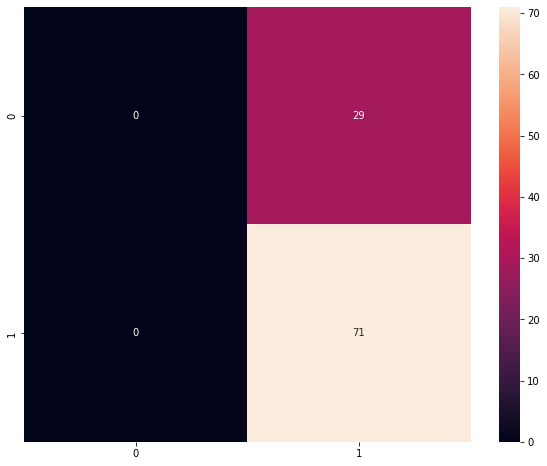

In [16]:
name_list, metrics = [], []
count = 1
import seaborn as sns
from matplotlib import pyplot as plt
def accuracy_eval(_name_, feature,actual_data):
    try:
        
        name_path = "./"+feature+"_after_model/"
        path = name_path
        web_name = path+_name_+'.csv'

        data_after_model = pd.read_csv(web_name)
        data_after_model_name = data_after_model["URL name"]

        actual_data_list = actual_data.values.tolist()
        data_after_model_list = data_after_model.values.tolist()
        for i in range(len(actual_data_list)):
            for j in range(len(data_after_model_list)):
                if (actual_data_list[i][-1])==data_after_model_list[j][-1]:
                     if (actual_data_list[i][-2]==1 and data_after_model_list[j][1]>data_after_model_list[j][0])  :
                            if data_after_model_list[j][-1].split('/')[-1].split('.')[0] not in name_list:
                                name_list.append(data_after_model_list[j][-1].split('/')[-1].split('.')[0])
                                #print((name_list))
                                return data_after_model_list[j][-1].split('/')[-1].split('.')[0]
    except:
      pass  

def check_feature(_feature_):
    path = "./result/"+_feature_+"/"+_feature_+"_GT__1.csv"
    actual_data = pd.read_csv(path)
#     classname = _feature_+"Class"
    actual = actual_data["sClass"]
    name_path_list = []
    for i in range(len(actual_data['URL name'])):
        name_path = (actual_data['URL name'][i].split('/')[-1]).split('.')[0]
        name_path_list.append(name_path)
    
    for i in name_path_list:
            name_list.append(accuracy_eval(i,_feature_,actual_data))
            list_difference = []
            for item in name_path_list:
                if item not in name_list:
                    list_difference.append(item)
                #print(i,item)
            if None in name_path_list:
                metrics.append(0)
            else:
                metrics.append(1)
#     print(list_difference)
    actual_data_list = actual.values.tolist()
    
    cf_train_matrix = confusion_matrix(actual_data_list, metrics)
    print(cf_train_matrix)
    plt.figure(figsize=(10,8))
    sns.heatmap(cf_train_matrix, annot=True, fmt='d')
    true_predict = (sum(x is not None for x in set(name_list)))
    print("Total number of webpage:",len(actual))
    print("Number of True predicted webpage:",true_predict)
    print("Accuracy for",_feature_,":",true_predict)
check_feature("search")

### Sort: Evaluation


[[ 0  9]
 [ 0 91]]
Total number of webpage: 100
Number of True predicted webpage: 26
Accuracy for sort : 26


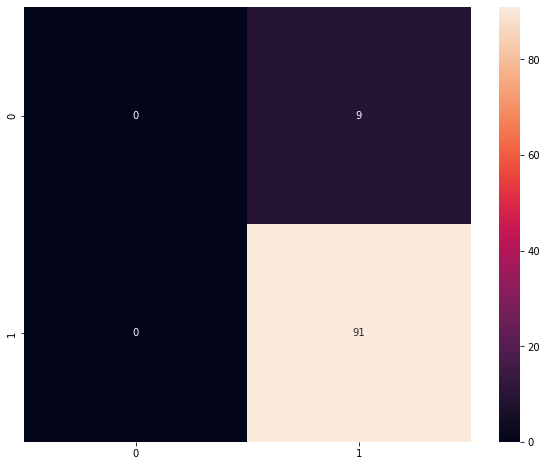

In [17]:
name_list, metrics = [], []
count = 1
import seaborn as sns
from matplotlib import pyplot as plt
def accuracy_eval(_name_, feature,actual_data):
        name_path = "./"+feature+"_after_model/"
        path = name_path
        web_name = path+_name_+'.csv'
        
        data_after_model = pd.read_csv(web_name)
        data_after_model_name = data_after_model["name_url"]
        actual_data_list = actual_data.values.tolist()
        data_after_model_list = data_after_model.values.tolist()

        for i in range(len(actual_data_list)):
            for j in range(len(data_after_model_list)):
                if (actual_data_list[i][-1])==data_after_model_list[j][-1] and actual_data_list[i][-3]==1:
                    if data_after_model_list[j][1]>data_after_model_list[j][0]:
                        if (actual_data_list[i][0]==data_after_model_list[j][2] and actual_data_list[i][1]==data_after_model_list[j][3] ):
                            if data_after_model_list[j][-1].split('/')[-1].split('.')[0] not in name_list:
                                return data_after_model_list[j][-1].split('/')[-1].split('.')[0]
                                name_list.append(data_after_model_list[j][-1].split('/')[-1].split('.')[0])
                                print(name_list)


def check_feature(_feature_):
    path = "./result/"+_feature_+"/"+_feature_+"_GT__2.csv"
    actual_data = pd.read_csv(path)
    classname = _feature_+"Class"
    actual = actual_data[classname]
    name_path_list = []
    for i in range(len(actual_data['name_url'])):
        name_path = (actual_data['name_url'][i].split('/')[-1]).split('.')[0]
        name_path_list.append(name_path)
    
    for i in name_path_list:
            name_list.append(accuracy_eval(i,_feature_,actual_data))
            list_difference = []
            for item in name_path_list:
                if item not in name_list:
                    list_difference.append(item)
                #print(i,item)
            if None in name_path_list:
                metrics.append(0)
            else:
                metrics.append(1)
#     print(list_difference)
    actual_data_list = actual.values.tolist()
    
    cf_train_matrix = confusion_matrix(actual_data_list, metrics)
    print(cf_train_matrix)
    plt.figure(figsize=(10,8))
    sns.heatmap(cf_train_matrix, annot=True, fmt='d')
    true_predict = (sum(x is not None for x in set(name_list)))
    print("Total number of webpage:",len((name_list)))
    print("Number of True predicted webpage:",true_predict)
    print("Accuracy for",_feature_,":",true_predict)
check_feature("sort")